In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_path='Housing_data.txt'
data=pd.read_csv(data_path, header=None, names=['House_Size', 'Bedrooms','House_Price'])
print(data.head())

   House_Size  Bedrooms  House_Price
0        2104         3       399900
1        1600         3       329900
2        2400         3       369000
3        1416         2       232000
4        3000         4       539900


In [5]:
print(data.describe())

        House_Size   Bedrooms    House_Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [7]:
data=pd.read_csv(data_path, header=None, names=['x1','x2','y'])

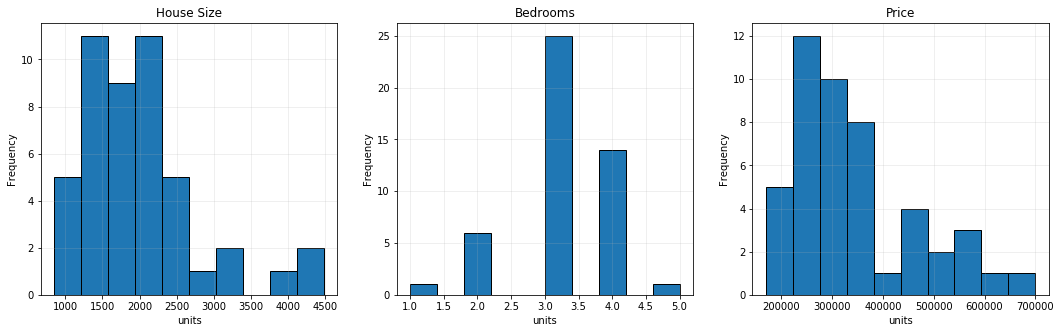

In [9]:
fig, ax=plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)

fig.subplots_adjust(left=0.2, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
plt1=plt.subplot(1,3,1)
plt2=plt.subplot(1,3,2)
plt3=plt.subplot(1,3,3)

plt1.hist(data['x1'], label='x1', edgecolor='black')
plt1.set_title('House Size')
plt1.set_xlabel('units')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both',alpha=0.25)

plt2.hist(data['x2'], label='x2', edgecolor='black')
plt2.set_title('Bedrooms')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both',alpha=0.25)

plt3.hist(data['y'], label='y', edgecolor='black')
plt3.set_title('Price')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both',alpha=0.25)

Normalizing data(Feature Scaling)

In [10]:
data_norm=(data-data.mean())/data.std()
data_norm.describe()

,x1,x2,y
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.746030e-16,-9.684924e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [12]:
data_norm.head()

,x1,x2,y
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


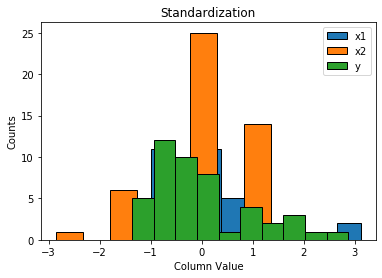

In [14]:
plt.hist(data_norm['x1'],label='x1',edgecolor='black')
plt.hist(data_norm['x2'],label='x2',edgecolor='black')
plt.hist(data_norm['y'],label='y',edgecolor='black')
plt.legend()
plt.title("Standardization")
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.show()



loading data into X and Y

In [24]:
x=data_norm[data_norm.columns[0:data_norm.shape[1]-1]]
y=data_norm['y']
#convert to np.array
x=x.values
y=y.values.reshape(-1,1)

In [25]:
#adding 1 to 1st colum and row to input matrix
X=np.insert(x,0,1, axis=1)

Hypothesis function

In [42]:
#cannot implt X*theta, because this is not a matrix, this is an array, where the transpose is not done, dot takes care of transpose
def h(X, theta):
    return X.dot(theta)

Cost Function

In [43]:
#taking number of dataset
m=y.shape[0]

def cost(theta, X, y):
    return (1./(2*m))*(h(X,theta)-y).T.dot(h(X,theta)-y)


In [44]:
#creating theta initial to be  0 0 0 array
theta_initial=np.zeros((X.shape[1],1))
cost(theta_initial,X,y)

array([[0.4893617]])

In [47]:
#val1=inverse(X.T*X)
val1=np.linalg.inv(np.dot(np.transpose(X),X))
#val2=XT*y
val2=np.dot(np.transpose(X),y)
#normal equation complete
theta_optimal=np.dot(val1,val2)
theta_optimal

array([[-8.76575535e-17],
       [ 8.84765988e-01],
       [-5.31788197e-02]])

In [48]:
y_predicted=h(X,theta_optimal)
print(y_predicted)

[[ 0.12692309]
 [-0.43419524]
 [ 0.45646878]
 [-0.56916611]
 [ 1.05458494]
 [-0.07544503]
 [-0.50767502]
 [-0.62680133]
 [-0.67912784]
 [-0.55220822]
 [-0.12554488]
 [ 0.01113677]
 [-0.11132953]
 [ 2.63020487]
 [-0.8038208 ]
 [ 0.27525393]
 [-0.6760458 ]
 [-0.83944737]
 [ 0.61927291]
 [ 1.08909818]
 [-0.24826912]
 [-0.04367434]
 [-0.42974192]
 [-0.10105162]
 [ 2.11533051]
 [-0.99086025]
 [-0.5922881 ]
 [ 0.59674836]
 [ 0.23380277]
 [ 0.72032799]
 [-0.09822752]
 [-0.96242956]
 [-0.01421188]
 [ 1.276993  ]
 [-0.26916445]
 [-0.61566803]
 [-0.83610738]
 [ 0.08821449]
 [ 2.40728092]
 [ 0.12161439]
 [-0.29306027]
 [ 0.27610932]
 [ 0.57251305]
 [-0.87952725]
 [-1.19708425]
 [-0.22351792]
 [-0.87618726]]


##### the coefficient of determination R^2 of the prediction:
\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}

# Gradient

In [62]:
def gradient(X,y,theta):
    grad=X.T.dot(h(X,theta)-y)
    return grad

In [70]:
def gradientDescent(X,y, theta,alpha, num_iters):
    J_history=np.zeros(num_iters)
    for iter in np.arange(num_iters):
        theta=theta-alpha*(1/m)*gradient(X,y,theta)
        J_history[iter]=cost(theta,X,y)[0][0]
    return(theta, J_history)


In [71]:
theta_initial=np.zeros((X.shape[1],1))
alpha=0.01
iterations=1500
theta,cost_history=gradientDescent(X,y, theta_initial, alpha, iterations)
print(theta)

[[-1.10939626e-16]
 [ 8.84042349e-01]
 [-5.24551809e-02]]


# Plotting Result

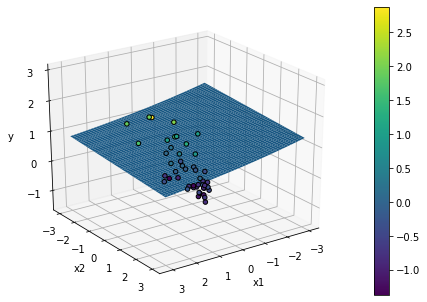

In [75]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
p=ax.scatter(data_norm['x1'],data_norm['x2'],data_norm['y'],edgecolors='black',c=data_norm['y'],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X1=np.linspace(3,-3)
X2=np.linspace(3,-3)

xx1,xx2=np.meshgrid(X1,X2)

yy=(theta[0]+theta[1]**xx1+theta[2]*xx2)
ax.plot_surface(xx1, xx2, yy)
ax.view_init(elev=25, azim=55)
plt.colorbar(p)
plt.show()

# Transforming normalized data back to raw data(x = 𝜇+ z 𝜎)


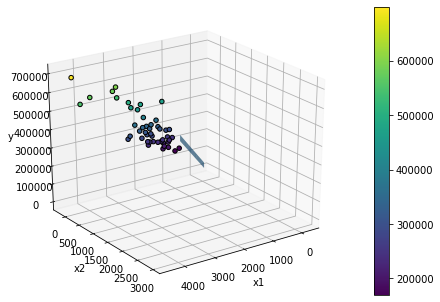

In [81]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=Axes3D(fig)
p=ax.scatter(data['x1'],data['x2'],data['y'],edgecolors='black',c=data['y'], alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X1=np.linspace(data_norm['x2'].min(),data_norm['x2'].max())
X2=np.linspace(data_norm['x1'].min(),data_norm['x1'].max())
xx1,xx2=np.meshgrid(X1,X2)

yy=(theta[0]+theta[1]*xx1+theta[2]*xx2)*data['y'].std()+data['y'].mean()
xx1=xx1*data['x1'].std()+data['x1'].mean()
xx2=xx1*data['x2'].std()+data['x2'].mean()
ax.plot_surface(xx1,xx2,yy)
ax.view_init(elev=25,azim=55)
plt.colorbar(p)
plt.show()